In [1]:
# Bibliotecas necessárias para o experimento

import numpy as np
import matplotlib.pyplot as plt
from random import randint
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
def S(Ut, Uf, X):
    W = np.dot(np.transpose(Uf), Ut)
    T = np.transpose(W)
    A = np.dot(np.transpose(Ut), np.transpose(X))
    C = np.dot(A, Uf)
    L = W - np.identity(3) - 1/2*(W - np.identity(3))**2
    S = 2*np.trace(np.dot((-np.dot(T, C) + 2*C),L))
    #S = 2*np.trace(np.dot((-1/2*np.dot(C, T) - 1/2*np.dot(T, C) + 2*C),L))
    return S

In [3]:
def field(Ut, Uf, a, h, A, B):
    SA = S(Ut, Uf, A)
    SB = S(Ut, Uf, B)
    f = -a*SA-h*(SB/SA)
    return f

In [4]:
def lind(u, Ut, Uf, t, lbda):
    Ax = [[0, 0, 0],[0, 0, -1], [0, 1, 0]]
    Ay = [[0, 0, 1],[0, 0, 0], [-1, 0, 0]]
    Az = [[0, -1, 0],[1, 0, 0], [0, 0, 0]]
    B = [[-0.001*lbda, 0, 0],[0, -0.001*lbda, 0], [0, 0, -1.001*lbda]] # Amplitude Damping
    #B = [[-1.01*lbda, 0, 0],[0, -1.01*lbda, 0], [0, 0, -0.01*lbda]] # Phase Damping
    if t == 0:
        fx=10.28
        fy=10.73
        fz=40
        F=np.dot(fx,Ax)+np.dot(fy,Ay)+np.dot(fz,Az)+B
    else:
        fx=field(Ut, Uf, u[0], u[3], Ax, B)
        fy=field(Ut, Uf, u[1], u[4], Ay, B)
        fz=field(Ut, Uf, u[2], u[5], Az, B)
        P=400

        if abs(fx) > P:
            if fx < 0:
                fx = -P
            else:
                fx = P
        if abs(fy) > P:
            if fy < 0:
                fy = -P
            else:
                fy = P
        if abs(fz) > P:
            if fz < 0:
                fz = -P
            else:
                fz = P

        F=np.dot(fx,Ax)+np.dot(fy,Ay)+np.dot(fz,Az)+B
        	
    return fx,fy,fz,F

In [5]:
def rungeKutta(u, Ut, Uf, h, t, lbda):
    fx,fy,fz,k1 = lind(u, Ut, Uf, t, lbda)
    k1 = np.dot(k1,Ut)
    fx,fy,fz,k2 = lind(u, (Ut+h/2*k1), Uf, t+h/2, lbda)
    k2 = np.dot(k2,(Ut+h/2*k1))
    fx,fy,fz,k3 = lind(u, (Ut+h/2*k2), Uf, t+h/2, lbda)
    k3 = np.dot(k3,(Ut+h/2*k2))
    fx,fy,fz,k4 = lind(u, (Ut+h*k3), Uf, t+h, lbda)
    k4 = np.dot(k4,(Ut+h*k3))
    a = fx;
    b = fy;
    c = fz;
    result = Ut+(h/6)*(k1+2*k2+2*k3+k4);
    return a,b,c,result

In [6]:
def leis_controle(fx, fy, fz, quant_pontos, lbda):
    ts = np.linspace(0, 0.1, quant_pontos)

    plt.ylabel("Valores das leis de controle") 
    plt.xlabel('Tempo (u. a.)') 
    plt.plot(ts, fx, color='g', marker='o', linewidth=1, markersize=1, label="$f_x(t)$")
    plt.plot(ts, fy, color='b', marker='_', linewidth=1, markersize=1, label="$f_y(t)$")
    plt.plot(ts, fz, color='r', marker='.', linewidth=1, markersize=1, label="$f_z(t)$")
    plt.legend(loc="upper right")
    plt.title(fr"Leis de controle para $\gamma = {lbda}$")
    plt.show()

In [7]:
def fidelidade(fid, quant_pontos, lbda):
    ts = np.linspace(0, 0.1, quant_pontos)

    fig, ax = plt.subplots()

    ax.set_ylabel("Valores de fidelidade") 
    ax.set_xlabel('Tempo (u. a.)') 
    ax.plot(ts, np.abs(fid), color='g', marker='*', linewidth=1, markersize=1, label=fr"$\gamma = {lbda}$")
    ax.legend(loc="center right")
    ax.set_title(fr"Fidelidade com $\gamma = {lbda}$")

    x1, x2, y1, y2 = 2.5, 4, 0, max(np.abs(fid))
    axins = inset_axes(ax, width="30%", height="30%", loc='upper center', borderpad=3)
    axins.set_xlim(0.009, 0.020)
    axins.set_ylim(0.98, 1)

    axins.plot(ts, np.abs(fid), color='g', marker='*', linewidth=1, markersize=1, label=fr"$\gamma = {lbda}$")
    ax.indicate_inset_zoom(axins)
    
    plt.show()

In [8]:
def distance(fid, quant_pontos, lbda):
    ts = np.linspace(0, 0.1, quant_pontos)

    fig, ax = plt.subplots()

    ax.set_ylabel("Valores de distância") 
    ax.set_xlabel('Tempo (u. a.)') 
    ax.plot(ts, np.abs(fid), color='g', marker='*', linewidth=1, markersize=1, label=fr"$\gamma = {lbda}$")
    ax.legend(loc="center right")
    ax.set_title(fr"Distância entre os operadores de evolução com $\gamma = {lbda}$")

    #x1, x2, y1, y2 = 2.5, 4, 0, max(np.abs(fid))
    #axins = inset_axes(ax, width="30%", height="30%", loc='upper center', borderpad=3)
    #axins.set_xlim(0.009, 0.020)
    #axins.set_ylim(0.98, 1)

    #axins.plot(ts, np.abs(fid), color='g', marker='*', linewidth=1, markersize=1, label=fr"$\gamma = {lbda}$")
    #ax.indicate_inset_zoom(axins)
    
    plt.show()

In [9]:
def densidade(rho, quant_pontos, lbda):
    ts = np.linspace(0, 0.1, quant_pontos)

    fig, ax = plt.subplots()

    ax.set_ylabel('Valores da matriz de densidade') 
    ax.set_xlabel('Tempo (u. a.)') 
    ax.plot(ts, abs(rho[0]), color='g', marker='o', linewidth=1, markersize=1, label=r"$\rho_{00}$")
    ax.plot(ts, abs(rho[1]), color='b', marker='8', linewidth=1, markersize=1, label=r"$\rho_{01}$")
    ax.plot(ts, abs(rho[2]), color='r', marker='.', linewidth=1, markersize=1, label=r"$\rho_{10}$")
    ax.plot(ts, abs(rho[3]), color='y', marker='*', linewidth=1, markersize=1, label=r"$\rho_{11}$")
    ax.legend(loc="center right")
    ax.set_title(fr"Evolução da matriz de densidade $\gamma = {lbda}$")

    x1, x2, y1, y2 = 2.5, 4, 0, max(max(abs(rho[0])), max(abs(rho[1])), max(abs(rho[2])), max(abs(rho[3])))
    axins = inset_axes(ax, width="30%", height="30%", loc='upper center', borderpad=3)
    axins.set_xlim(0.009, 0.020)
    axins.set_ylim(0.98, 1)

    axins.plot(ts, abs(rho[0]), color='g', marker='o', linewidth=1, markersize=1, label=r"$\rho_{00}$")
    axins.plot(ts, abs(rho[1]), color='b', marker='8', linewidth=1, markersize=1, label=r"$\rho_{01}$")
    axins.plot(ts, abs(rho[2]), color='r', marker='.', linewidth=1, markersize=1, label=r"$\rho_{10}$")
    axins.plot(ts, abs(rho[3]), color='y', marker='*', linewidth=1, markersize=1, label=r"$\rho_{11}$")

    ax.indicate_inset_zoom(axins)
    
    plt.show()

############ Informações finais do experimento ############

O rf desejado é:
 [[1]
 [0]
 [0]]
O rho desejado é: [[np.float64(0.5), np.complex128(0.5+0j)], [np.complex128(0.5+0j), np.float64(0.5)]]
O vetor de Bloch encontrado é:
 [[ 1.00001130e+00]
 [-3.46180613e-04]
 [ 2.96838899e-03]]
O rho alcançado foi:
 [[np.float64(0.501484194495529), np.complex128(0.5000056489567264+0.00017309030644898632j)], [np.complex128(0.5000056489567264-0.00017309030644898632j), np.float64(0.49851580550447105)]]
A fidelidade do experimento é de: (0.9999988985803169+0j)
A fidelidade do experimento é de (fórmula dos autores do artigo): 0.9974583835700358
O vetor U alcançado foi:
 [[ 1.00001130e+00  4.15106556e-04  2.63638826e-03]
 [-3.46180613e-04 -9.97844215e-01 -3.55426797e-04]
 [ 2.96838899e-03 -4.16496659e-04 -9.98327266e-01]]
A distância encontrada, ao final do experimento foi: 2.379940385809837e-05

############ Informações gráficas obtidas com o experimento ############



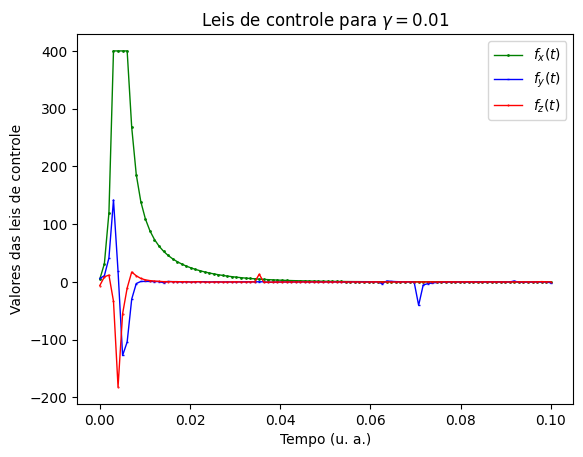

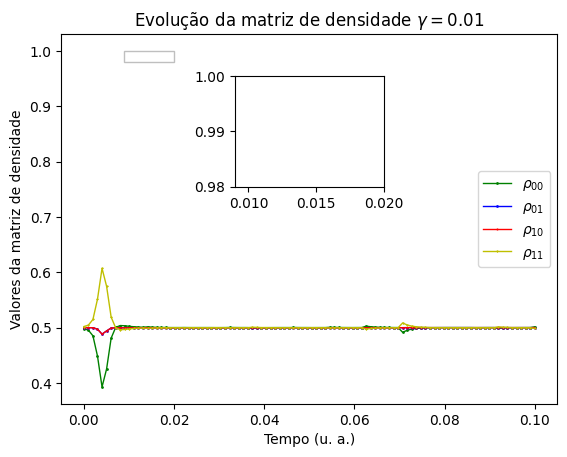

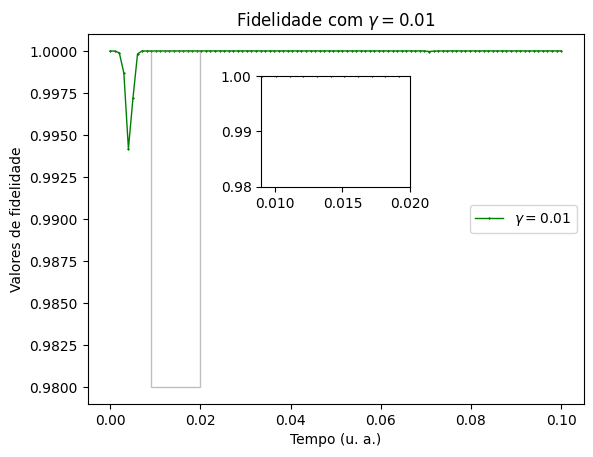

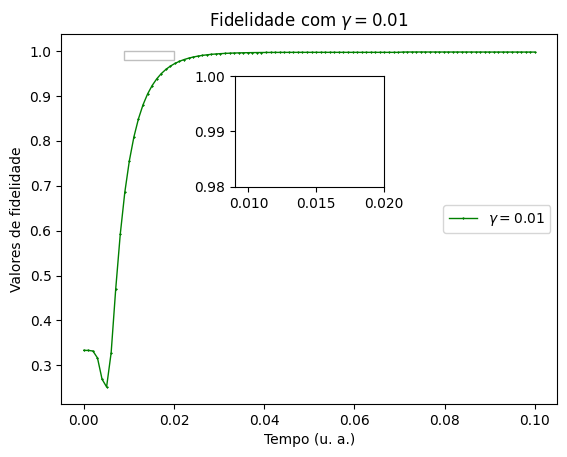

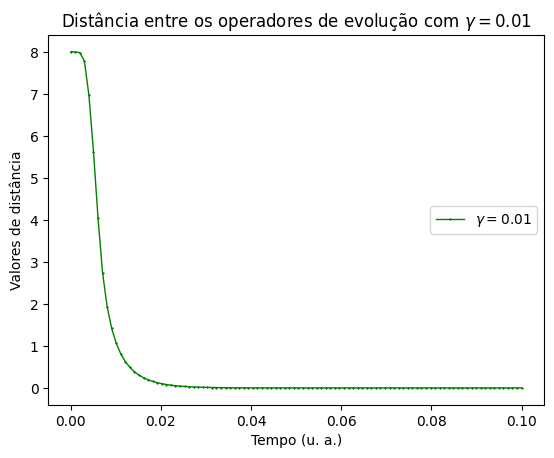

In [10]:
u = [26, 141, 74, 0.35, 0.31, 0.34] 

Ut = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
Uf = [[1, 0, 0], [0, -1, 0], [0, 0, -1]]

print(f"############ Informações finais do experimento ############\n")

r0 = [[1], [0], [0]]
rf = np.dot(Uf, r0)
print(f'O rf desejado é:\n {rf}')
pf = [[1/2*(1+rf[2][0]), 1/2*(rf[0][0]-1j*rf[1][0])], [1/2*(rf[0][0]+1j*rf[1][0]), 1/2*(1-rf[2][0])]]
print(f'O rho desejado é: {pf}')

h=0.001
t=0
i=0
lbda=0.01
distance_vector = []
fx_vector = []
fy_vector = []
fz_vector = []
rho_vector = np.zeros((4,100),dtype=np.complex128)
fid_vector = []
fid_autores = []
   
while t < 100:
    a,b,c,Ut = rungeKutta(u, Ut, Uf, h, t, lbda)
    D = np.linalg.norm(Ut-Uf)**2
    distance_vector.append(D)
    fx_vector.append(a)
    fy_vector.append(b)
    fz_vector.append(c)
    rt = np.dot(Ut, r0)
    pt = [[1/2*(1+rt[2][0]), 1/2*(rt[0][0]-1j*rt[1][0])], [1/2*(rt[0][0]+1j*rt[1][0]), 1/2*(1-rt[2][0])]]
    rho_vector[0][t] = pt[0][0]
    rho_vector[1][t] = pt[0][1]
    rho_vector[2][t] = pt[1][0]
    rho_vector[3][t] = pt[1][1]
    fid_vector.append(np.trace(np.sqrt(np.sqrt(pt)*pf*np.sqrt(pt))))
    fid_autores.append((np.trace(np.dot(Ut, np.transpose(Ut)))+np.abs(np.trace(np.dot(np.transpose(Uf), Ut)))**2)/(3*(3+1)))
    t += 1

rt = np.dot(Ut, r0)
print(f'O vetor de Bloch encontrado é:\n {rt}')
pt = [[1/2*(1+rt[2][0]), 1/2*(rt[0][0]-1j*rt[1][0])], [1/2*(rt[0][0]+1j*rt[1][0]), 1/2*(1-rt[2][0])]]
print(f'O rho alcançado foi:\n {pt}')
print(f'A fidelidade do experimento é de: {np.trace(np.sqrt(np.sqrt(pt)*pf*np.sqrt(pt)))}')
print(f'A fidelidade do experimento é de (fórmula dos autores do artigo): {(np.trace(np.dot(Ut, np.transpose(Ut)))+np.abs(np.trace(np.dot(np.transpose(Uf), Ut)))**2)/(3*(3+1))}')
print(f'O vetor U alcançado foi:\n {Ut}')
print(f'A distância encontrada, ao final do experimento foi: {D}')

print(f"\n############ Informações gráficas obtidas com o experimento ############\n")

leis_controle(fx_vector,fy_vector,fz_vector,t,lbda)
densidade(rho_vector,t,lbda)
fidelidade(fid_vector,t,lbda)
fidelidade(fid_autores,t,lbda)
distance(distance_vector,t,lbda)

In [11]:
print(f"\n############ Informações provenientes de análises gráficas ############\n")

time = 0
for i in range(len(rho_vector[0])):
    if rho_vector[0][i] == max(abs(rho_vector[0])):
        time = i
        break
print(fr"O maior valor obtido para ρ, na primeira posição da matriz, foi {max(abs(rho_vector[0]))} para o tempo de {time/1000}, com fidelidade de {np.abs(fid_vector[time])} e de acordo com a fórmula dos autores, com fidelidade de {np.abs(fid_autores[time])}")


############ Informações provenientes de análises gráficas ############

O maior valor obtido para ρ, na primeira posição da matriz, foi 0.5037456794319658 para o tempo de 0.008, com fidelidade de 0.9999929848197653 e de acordo com a fórmula dos autores, com fidelidade de 0.5919267069950348


In [12]:
print(fid_autores)

[np.float64(0.33331484710578324), np.float64(0.33322596655077663), np.float64(0.3319845213384874), np.float64(0.3163856712985213), np.float64(0.26929514128588833), np.float64(0.2520026396018282), np.float64(0.328188979064399), np.float64(0.46977320066785627), np.float64(0.5919267069950348), np.float64(0.6854235778974914), np.float64(0.7557272606781454), np.float64(0.8087603529156623), np.float64(0.8491148759467618), np.float64(0.8801195380008813), np.float64(0.9041631104792076), np.float64(0.9229512604915969), np.float64(0.9377344294571506), np.float64(0.9494334935282297), np.float64(0.9587361473410341), np.float64(0.9661623812342522), np.float64(0.9721094577606822), np.float64(0.9768844719461857), np.float64(0.9807278289279223), np.float64(0.983824717365104), np.float64(0.986324005514931), np.float64(0.9883431403393766), np.float64(0.9899757350693316), np.float64(0.9912965739191774), np.float64(0.9923656347907776), np.float64(0.9932318068143616), np.float64(0.9939325703126972), np.flo

In [13]:
print(fid_vector)

[np.complex128(0.999998169650671+0j), np.complex128(0.9999898520674146+0j), np.complex128(0.9998905010365062+0j), np.complex128(0.9986749302532434+0j), np.complex128(0.9941752746489334+0j), np.complex128(0.9971962063663768+0j), np.complex128(0.9998209543825292+0j), np.complex128(0.9999998771424731+0j), np.complex128(0.9999929848197653+0j), np.complex128(0.9999944464110009+0j), np.complex128(0.9999973712832604+0j), np.complex128(0.9999987683787503+0j), np.complex128(0.9999994657528943+0j), np.complex128(0.9999998079031696+0j), np.complex128(0.9999990681798555+0j), np.complex128(0.9999996752816942+0j), np.complex128(0.9999998870388627+0j), np.complex128(0.9999999720732593+0j), np.complex128(0.9999999699186494+0j), np.complex128(0.9999999933856929+0j), np.complex128(0.9999999978140652+0j), np.complex128(0.9999999961167865+0j), np.complex128(0.9999999787520757+0j), np.complex128(0.9999999968493953+0j), np.complex128(0.9999999988167467+0j), np.complex128(0.9999999977186739+0j), np.complex12

In [14]:
print(distance_vector)

[np.float64(7.999778162938022), np.float64(7.998711286882141), np.float64(7.983752696838178), np.float64(7.78567037201264), np.float64(6.969318950719785), np.float64(5.628887248458167), np.float64(4.045265580212103), np.float64(2.7378358418595656), np.float64(1.935780033785742), np.float64(1.4158340736696056), np.float64(1.0608286340654591), np.float64(0.8090869000409139), np.float64(0.625426274694976), np.float64(0.4884729892593547), np.float64(0.38459489135781705), np.float64(0.3047125827369935), np.float64(0.2426324288449933), np.float64(0.19396883541871185), np.float64(0.1555579157015774), np.float64(0.12507068833227883), np.float64(0.10076348149425406), np.float64(0.08131404636237785), np.float64(0.06570863010007899), np.float64(0.05315171909829276), np.float64(0.04303223951989704), np.float64(0.034864200230684), np.float64(0.028262936473639477), np.float64(0.022922431002680474), np.float64(0.018598312392250935), np.float64(0.015094997734261427), np.float64(0.012254628042258891), 

In [15]:
print(min(distance_vector))

7.776607291260251e-06


In [16]:
print(max(fid_autores))

0.9976027958660079
